<a href="https://colab.research.google.com/github/Monalika-P/MTCNN/blob/Monalika-P-patch-1/MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author - Monalika P

### IMporting the depencies

In [9]:
import cv2
from cv2 import imread
from cv2 import CascadeClassifier

### Loading the image and XML file

In [10]:
image = imread('test.jpg')
classifier = cv2.CascadeClassifier('cascade.xml')

### Face Recognition

In [11]:
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)

[454 141 320 320]


### Drawing the rectangular bounding box

In [5]:
# extract
x, y, width, height = box
x2, y2 = x + width, y + height
cv2.rectangle(image, (x, y), (x2, y2), (0,0,255), 1)

array([[[63, 63, 63],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)

In [6]:
drawn = cv2.rectangle(image, (x, y), (x2, y2), (0,0,255), 1)

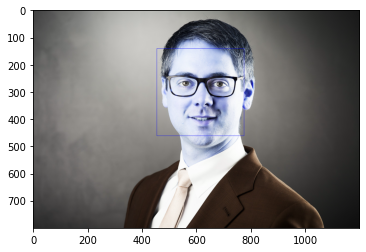

In [8]:
import matplotlib.pyplot as plt
plt.imshow(drawn)

### For multiple images with accuracy

In [39]:
import numpy as np
fname = '/content/test2.png'
img = cv2.imread(fname)
img = np.array(img, dtype='uint8')

In [40]:
# perform face detection
bboxes = classifier.detectMultiScale(image2, 1.1, 3)

In [41]:
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	cv2.rectangle(img, (x, y), (x2, y2), (0,0,255), 1)

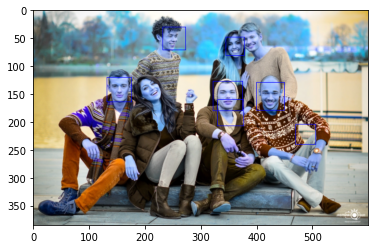

In [42]:
plt.imshow(img)

### Face Detection using MTCNN

The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.


#### Installing the package

In [43]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [44]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras, opencv-python
Required-by: 


In [45]:
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, astunparse, scipy, tensorboard, wheel, opt-einsum, grpcio, six, gast, termcolor, wrapt, google-pasta, protobuf, h5py, tensorflow-estimator, absl-py, numpy
Required-by: fancyimpute


In [49]:
from mtcnn.mtcnn import MTCNN

In [80]:
filename = '/content/t3.jpg'

In [85]:
test = plt.imread(filename)

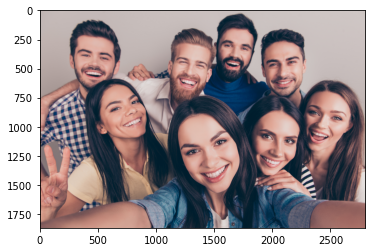

In [86]:
plt.imshow(test)

#### Draw an image with detected onjects

In [87]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle

def draw_image_with_boxes(filename, result_list):

	data = pyplot.imread(filename)
	
	pyplot.imshow(data)
	
	ax = pyplot.gca() 	# get the context of drawing boes

	for result in result_list: # plot each box
		
		x, y, width, height = result['box'] # get coordinates
		
		rect = Rectangle((x, y), width, height, fill=False, color='red') # create the shape
	
		ax.add_patch(rect) 	# draw the box

	pyplot.show() 	# show the plot

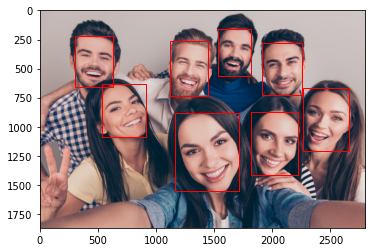

In [88]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(test)
# display faces on the original image
draw_image_with_boxes(filename, faces)